## Exploring `DataFrame` information

> **Learning goal:** By the end of this subsection, you should be comfortable finding general information about the data stored in pandas DataFrames.

Once you have loaded your data into pandas, it will more likely than not be in a `DataFrame`. However, if the data set in your `DataFrame` has 60,000 rows and 400 columns, how do you even begin to get a sense of what you're working with? Fortunately, pandas provides some convenient tools to quickly look at overall information about a `DataFrame` in addition to the first few and last few rows.

In order to explore this functionality, we will import the Python scikit-learn library and use an iconic dataset that every data scientist has seen hundreds of times: British biologist Ronald Fisher's *Iris* data set.

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species.

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### `DataFrame.shape`
We have loaded the Iris Dataset in the variable `iris_df`. Before diving into the data, it would be valuable to know the number of datapoints we have and the overall size of the dataset. It is useful to look at the volume of data we are dealing with. 

In [3]:
iris_df.shape

(150, 4)

So, we are dealing with 150 rows and 4 columns of data. Each row represents one datapoint and each column represents a single feature associated with the data frame. So basically, there are 150 datapoints containing 4 features each.

`shape` here is an attribute of the dataframe and not a function, which is why it doesn't end in a pair of parentheses. 

### `DataFrame.columns`
Let us now move into the 4 columns of data. What does each of them exactly represent? The `columns` attribute will give us the name of the columns in the dataframe. 

In [4]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

As we can see, there are four(4) columns. The `columns` attribute tells us the name of the columns and basically nothing else. This attribute assumes importance when we want to identify the features a dataset contains.

### `DataFrame.info`
The amount of data(given by the `shape` attribute) and the name of the features or columns(given by the `columns` attribute) tell us something about the dataset. Now, we would want to dive deeper into the dataset. The `DataFrame.info()` function is quite useful for this. 

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


From here, we get to can make a few observations:
1. The DataType of each column: In this dataset, all of the data is stored as 64-bit floating-point numbers.
2. Number of Non-Null values: Dealing with null values is an important step in data preparation. It will be dealt with later in the notebook.

### DataFrame.describe()
Say we have a lot of numerical data in our dataset. Univariate statistical calculations such as the mean, median, quartiles etc. can be done on each of the columns individually. The `DataFrame.describe()` function provides us with a statistical summary of the numerical columns of a dataset.



In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The output above shows the total number of data points, mean, standard deviation, minimum, lower quartile(25%), median(50%), upper quartile(75%) and the maximum value of each column.

### `DataFrame.head`
With all the above functions and attributes, we have got a top level view of the dataset. We know how many data points are there, how many features are there, the data type of each feature and the number of non-null values for each feature.

Now its time to look at the data itself. Let's see what the first few rows(the first few datapoints) of our `DataFrame` look like:

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


As the output here, we can see five(5) entries of the dataset. If we look at the index at the left, we find out that these are the first five rows.

### `DataFrame.tail`
Another way of looking at the data can be from the end(instead of the beginning). The flipside of `DataFrame.head` is `DataFrame.tail`, which returns the last five rows of a `DataFrame`:

In [ ]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In practice, it is useful to be able to easily examine the first few rows or the last few rows of a `DataFrame`, particularly when you are looking for outliers in ordered datasets. 

All the functions and attributes shown above with the help of code examples, help us get a look and feel of the data. 

> **Takeaway:** Even just by looking at the metadata about the information in a DataFrame or the first and last few values in one, you can get an immediate idea about the size, shape, and content of the data you are dealing with.

# Scaling

Normalization and Standardization are two techniques commonly used during Data Preprocessing to adjust the features to a common scale.

Scaling or Feature Scaling is the process of changinng the scale of certain features to a common one. This is typically achieved through normalization and standardization (scaling techniques).

Normalization is the process of scaling data into a range of [0, 1]. It's more useful and common for regression tasks.

*`x_new = (x_origin - x_min) / (x_max - x_min)`*

Standardization is the process of scaling data so that they have a mean value of 0 and a standard deviation of 1. It's more useful and common for classification tasks.

*`x_new = (x_origin - variance)/deviation`*

A normal distribution with these values is called a standard normal distribution. It's worth noting that standardizing data doesn't guarantee that it'll be within the [0, 1] range. It most likely won't be - which can be a problem for certain algorithms that expect this range. To perform standardization, Scikit-Learn provides us with the StandardScaler class.

Normalization is also known as Min-Max Scaling and Scikit-Learn provides the MinMaxScaler for this purpose. On the other hand, it also provides a Normalizer, which can make things a bit confusing.

Note: The Normalizer class doesn't perform the same scaling as MinMaxScaler. Normalizer works on rows, not features, and it scales them independently.

(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([-2.43394714, -1.8814749 , -1.32900266, -0.77653042, -0.22405819,
         0.32841405,  0.88088629,  1.43335853,  1.98583077,  2.53830301,
         3.09077525]),
 <a list of 10 Patch objects>)

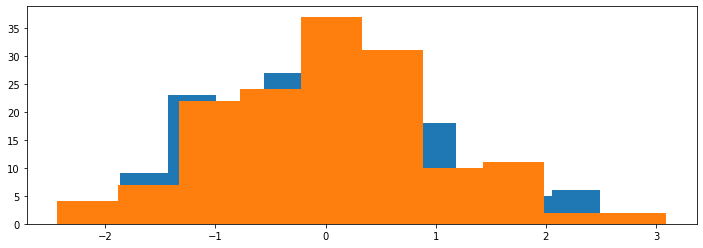

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
  
dataset = load_iris()
scaler= StandardScaler()
  
# Splitting the independent and dependent variables
i_data = dataset.data
response = dataset.target
  
# standardization 
x_std = scaler.fit_transform(i_data) 
# plot
fig, ax = plt.subplots(figsize=(12, 4))
ax.hist(x_std[:,0])
ax.hist(x_std[:,1])



To normalize features, we use the MinMaxScaler class. It works in much the same way as StandardScaler, but uses a fundementally different approach to scaling the data. They are normalized in the range of [0, 1]. If we were to plot the distributions again, we'd be greeted with:

(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

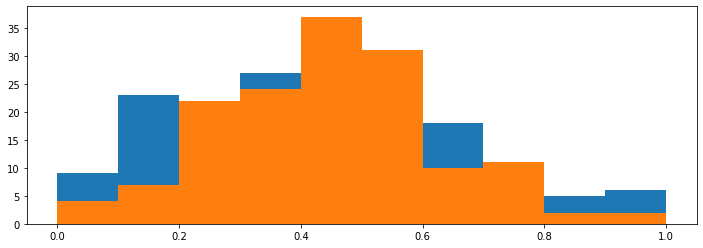

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(i_data)

ax.hist(x_minmax [:,0])
ax.hist(x_minmax [:,1])